In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Расчет по формулам с использованием ковариационной (корреляционной) матрицы.

#### Импорт данных.

Экономика городов

Данные описывают экономические условия в `48` городах мира в `1991` году. Данные были собраны отделом экономических исследований банка `Union (Швейцария)`. Описаны экономические условия в `48` городах мира в `1991` году. 

Число наблюдений: `48` 
Названия переменных: 
- `City` (Город): Название города
- `Work` (Работа): Взвешенное среднее числа рабочих часов, сосчитанное по `12` профессиям 
- `Price` (Цена): Индекс цен `112` товаров и услуг, включая арендную плату за жилье	(значение для Цюриха взято за `100%`) 
- `Salary` (Заработная плата) : Индекс заработной платы за час работы, сосчитанный по `12` профессиям после налогов и вычетов  (значение для Цюриха взято за `100%`)


Загрузим данные из файла `1.csv`, поменяем `,` на `.`, чтобы возможно было преобразовать в тип `float` столбцы `Price, Salary`.

#### Data

In [2]:
def fun(f: pd.Series):
    return f.replace(',', '.')

In [3]:
data = pd.read_csv('1.csv',  sep=';', comment='#', index_col = 'City')
data['Salary'] = data['Salary'].apply(fun).astype(float)
data['Price'] = data['Price'].apply(fun).astype(float)
data['Work'] = data['Work'].astype(int)
data.head()

Work  Price  Salary
City                          
Amsterdam  1714   65.6    49.0
Athens     1792   53.8    30.4
Bogota     2152   37.9    11.5
Bombay     2052   30.3     5.3
Brussels   1708   73.8    50.5

In [4]:
city = data.index.values
city

array(['Amsterdam', 'Athens', 'Bogota', 'Bombay', 'Brussels',
       'Buenos_Aires', 'Cairo', 'Caracas', 'Chicago', 'Copenhagen',
       'Dublin', 'Dusseldorf', 'Frankfurt', 'Geneva', 'Helsinki',
       'Hong_Kong', 'Houston', 'Jakarta', 'Johannesburg', 'Kuala_Lumpur',
       'Lagos', 'Lisbon', 'London', 'Los_Angeles', 'Luxembourg', 'Madrid',
       'Manila', 'Mexico_City', 'Milan', 'Montreal', 'Nairobi',
       'New_York', 'Nicosia', 'Oslo', 'Panama', 'Paris', 'Rio_de_Janeiro',
       'San_Paulo', 'Seoul', 'Singpore', 'Stockholm', 'Sydney', 'Taipei',
       'Tel_Aviv', 'Tokyo', 'Toronto', 'Vienna', 'Zurich'], dtype=object)

#### StandartScaler

In [5]:
X = data.values
X_normalise = (X - X.mean(axis = 0)) / X.std(axis = 0, ddof = 1)
X_normalise.shape

(48, 3)

### Ковариационная матрица

In [6]:
cov_matrix = np.cov(X_normalise, rowvar=False)
cov_matrix

array([[ 1.        , -0.49807523, -0.49410523],
       [-0.49807523,  1.        ,  0.81469552],
       [-0.49410523,  0.81469552,  1.        ]])

### Correlation Matrix

In [7]:
corr_matrix = np.corrcoef(X_normalise, rowvar = False)
corr_matrix

array([[ 1.        , -0.49807523, -0.49410523],
       [-0.49807523,  1.        ,  0.81469552],
       [-0.49410523,  0.81469552,  1.        ]])

In [8]:
cor_df = pd.DataFrame(corr_matrix, 
                      columns = ['Work','Price','Salary'], 
                      index = ['Work','Price','Salary'])

### Применение PCA

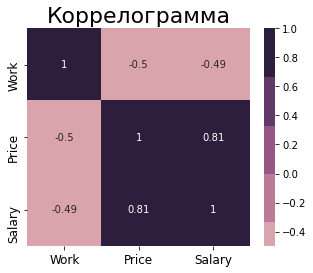

In [9]:
plt.figure(figsize=(5, 4))
sns.heatmap(cor_df, \
            xticklabels=cor_df.columns, \
            yticklabels=cor_df.columns, \
            cmap=sns.cubehelix_palette(), center=0, annot=True)

# Decorations
plt.title('Коррелограмма', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

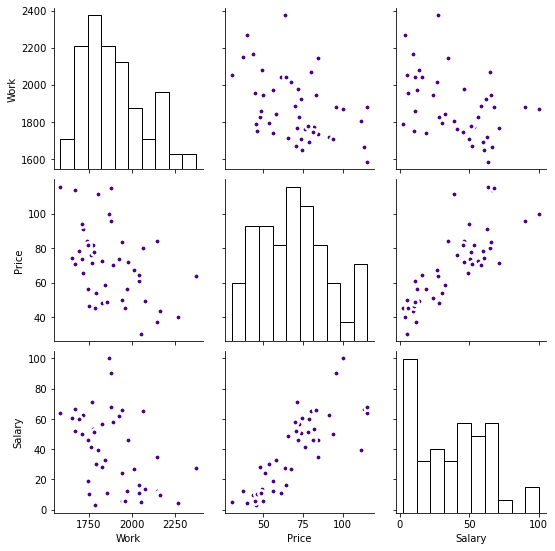

In [10]:
import seaborn as sns
sns.pairplot(data, \
             kind="scatter",  \
             plot_kws=dict(s=40, edgecolor="white", color = 'indigo', linewidth=2.5),
             markers=["o"],diag_kws=dict(fill=False))
plt.show()

**Вывод**: применение PCA возможно, так как видна сильная линейная зависимость между `Salary` и `Price`, а так же средняя обратная линейная зависимость между `Work` и остальными признаками.

## Тест сферичности Бартлетта

Проверим применимость PCA с помощью следуюищх тестов:

- тест сферичности Бартлетта
- индекс КМО

Как мы видели в корреляицонной матрице некоторые признаки взаимосвязаны и, возможно, стоит применить PCA, подтвердим с помощью статистической гипотезы - теста сферичности Бартлетта:

На вход подается корреляционная матрица и выявляется различие данной корреляционной матрицы от единичной:

$H_0$ - переменные ортогональны

Если нулевая гипотеза отклоняется, то можно применить PCA для сжатия пространства их исходных признаков.

$$ \xi^2 =- \left(n - 1 - \frac{2p+5}{6}\right) \cdot \ln det(R)$$
где $p$ - число признаков, $n$ - число наблюдений. 

$df = \frac{p(p-1)}{2}$

Напишем для этого функцию.

In [11]:
import numpy as np
import math as math
import scipy.stats as stats
import collections

def bartlett_sphericity(dataset, corr_method="pearson"):
    '''
    n, p = 
    '''
    n, p  = dataset.shape
    n_p_ratio = n / p
    chi2 = - (n - 1 - (2 * p + 5) / 6) * \
    math.log(np.linalg.det(dataset.corr(method=corr_method))) #статистика критерия
    ddl = p * (p - 1) / 2 #количество степеней свободы
    pvalue = 1 - stats.chi2.cdf(chi2 , ddl) #pvalue
    Result = collections.namedtuple("Bartlett", ["chi2", "ddl", "pvalue"], rename=False)   
    result = Result(chi2=chi2,ddl=ddl,pvalue=pvalue) 
    if n_p_ratio >= 5 :
        print("n_p_ratio: {0:8.2f}".format(n_p_ratio))
        print(r"Лучше все-таки исползовать КМО, так как применяется для n / p < 5")
    return result


In [12]:
bartlett_sphericity(data)

n_p_ratio:    16.00
Лучше все-таки исползовать КМО, так как применяется для n / p < 5


Bartlett(chi2=63.517937384775536, ddl=3.0, pvalue=1.0402789740737717e-13)

Мы видим, что на основании p-value теста Бартлетта можно сказать, что нулевая гипотеза отвергается и мы можем применять метод `PCA`

### КМО

Воспользуемся примером из данного репозитория, человек реализовал за нас [КМО](https://github.com/Sarmentor/KMO-Bartlett-Tests-Python)

In [13]:
def kmo(dataset_corr):
    
    import numpy as np
    import math as math
    import collections
    
    r"""
    
    Parameters
    ----------
    dataset_corr : ndarray
        Array containing dataset correlation
        
    Returns
    -------
    out : namedtuple
        The function outputs the test value (value), the test value per variable (per_variable)
       
        Ex:
        Out[30]: 
        KMO_Test_Results(value=0.798844102413, 
        per_variable=
        Q1     0.812160468405
        Q2     0.774161264483
        Q3     0.786819432663
        Q4     0.766251123086
        Q5     0.800579196084
        Q6     0.842927745203 
        Q7     0.792010173432 
        Q8     0.862037322891
        Q9     0.714795031915 
        Q10    0.856497242574
        dtype: float64)
    
    References
    ----------    
    [1] Kaiser, H. F. (1970). A second generation little jiffy. Psychometrika, 35(4), 401-415.
    [2] Kaiser, H. F. (1974). An index of factorial simplicity. Psychometrika, 39(1), 31-36.
    [3] R. Sarmento and V. Costa, (2017)
    "Comparative Approaches to Using R and Python for Statistical Data Analysis", IGI-Global
    
    Examples
    --------
    illustration how to use the function.
    
    >>> kmo_test(survey_data.corr(method="spearman"))
         
        KMO_Test_Results(value=0.798844102413, 
        per_variable=
        Q1     0.812160468405
        Q2     0.774161264483
        Q3     0.786819432663
        Q4     0.766251123086
        Q5     0.800579196084
        Q6     0.842927745203 
        Q7     0.792010173432 
        Q8     0.862037322891
        Q9     0.714795031915 
        Q10    0.856497242574
        dtype: float64) 
    """
    
    

    #KMO Test
    #inverse of the correlation matrix
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    
    #partial correlation matrix
    A = np.ones((nrow_inv_corr,ncol_inv_corr))
    for i in range(0,nrow_inv_corr,1):
        for j in range(i,ncol_inv_corr,1):
            #above the diagonal
            A[i,j] = - (corr_inv[i,j]) / (math.sqrt(corr_inv[i,i] * corr_inv[j,j]))
            #below the diagonal
            A[j,i] = A[i,j]
    
    #transform to an array of arrays ("matrix" with Python)
    dataset_corr = np.asarray(dataset_corr)
        
    #KMO value
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(dataset_corr)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    
    
    kmo_j = [None]*dataset_corr.shape[1]
    #KMO per variable (diagonal of the spss anti-image matrix)
    for j in range(0, dataset_corr.shape[1]):
        kmo_j_num = np.sum(dataset_corr[:,[j]] ** 2) - dataset_corr[j,j] ** 2
        kmo_j_denom = kmo_j_num + np.sum(A[:,[j]] ** 2) - A[j,j] ** 2
        kmo_j[j] = kmo_j_num / kmo_j_denom

    
    Result = collections.namedtuple("KMO_Test_Results", ["value", "per_variable"])   
    
    #Output of the results - named tuple    
    return Result(value=kmo_value,per_variable=kmo_j)

In [14]:
kmo(dataset_corr=cor_df)

KMO_Test_Results(value=0.6452232119739585, per_variable=[0.8805705207078308, 0.6012369471349254, 0.6022092440174861])

## PCA

### Собственные значения

In [15]:
eig_values, eig_vectors =  np.linalg.eig(corr_matrix)
eig_values

array([2.21860901, 0.59610189, 0.1852891 ])

In [16]:
eig_vectors

array([[ 0.49894104, -0.86661863, -0.00547599],
       [-0.61329104, -0.34861343, -0.70876144],
       [-0.61231686, -0.35698855,  0.70542699]])

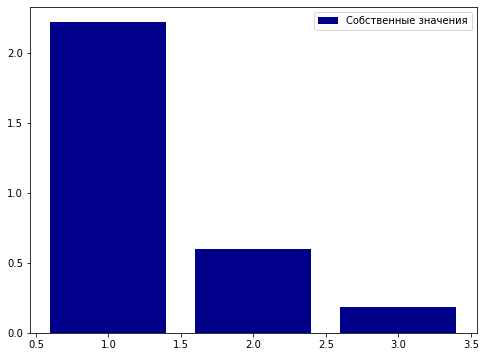

In [17]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.bar(range(1, len(eig_values)+1), eig_values, label = 'Собственные значения', color = 'darkblue')
ax.legend()
plt.show()

Один собственный вектор больше единицы - такое условие отбора применяется в метода главных компонент. Дает нижнюю оценку числа общих факторов. Определим минимальное количество факторов.

#### Процент дисперсии переменной объясненный фактором

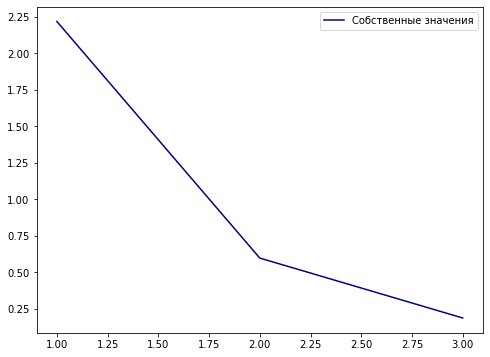

In [18]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.plot(range(1, len(eig_values)+1), eig_values, label = 'Собственные значения', color = 'darkblue')
ax.legend()
plt.show()

In [19]:
eig_values / np.sum(eig_values)*100

array([73.95363353, 19.87006303,  6.17630344])


#### Объясненная суммарная дисперсия

In [20]:
np.cumsum(eig_values)/ np.sum(eig_values)*100

array([ 73.95363353,  93.82369656, 100.        ])

**Количество факторов**: видим, что первый и второй фактор вносят наибольший вклад в объясненную дисперсию, да и графически это тоже определяется. В итоге выбираем $2$ фактора.

## 2. . Дать интерпретацию  полученным главным компонентам, используя факторную нагрузку и визуализацию.

Не нормированные главные компоненты
Собственные векторы - матрица перехода 
(матрица вращения, так как исходные данные центрированы)
Матрица счетов (score) - старые переменные в новой системе координат

In [21]:
score = X_normalise @ (eig_vectors)
score.shape

(48, 3)

Получим матрицу факторов

In [22]:
factors1 = np.array([np.array(a / np.sqrt(b)) for a, b in zip(score.T, eig_values)]).T
factors1.shape

(48, 3)

In [23]:
factors1

array([[-4.45256660e-01,  9.79997098e-01,  9.59179048e-01],
       [ 2.30665789e-01,  1.08172452e+00,  6.21020968e-01],
       [ 1.51591425e+00, -4.91505345e-01,  5.52993618e-01],
       [ 1.57510974e+00,  4.07246946e-01,  7.26352580e-01],
       [-6.36222930e-01,  8.19739499e-01,  4.38574110e-01],
       [ 8.17234975e-01,  2.45873526e-01, -7.43941142e-01],
       [ 1.51573810e+00, -4.75404582e-01,  6.59685426e-01],
       [ 8.81830324e-01, -2.64216083e-01, -1.22459862e+00],
       [-4.22806944e-01, -7.46386194e-01,  1.16619131e+00],
       [-1.15494327e+00,  1.70351634e-01, -6.84321504e-02],
       [-4.32238949e-01,  6.23872865e-01, -3.30412348e-01],
       [-9.13268300e-01,  6.36062109e-01,  7.22983255e-01],
       [-9.21308505e-01,  9.84463514e-01,  1.04153325e+00],
       [-1.38982949e+00, -1.45441902e+00,  1.37615829e+00],
       [-1.73094713e+00, -4.75484193e-02, -1.50680217e+00],
       [ 1.17385422e+00, -2.72722260e+00, -3.47344147e-01],
       [-2.64935096e-02, -7.53248752e-01

#### Матрица нагрузок 

По первому элементу (так как собственное значение больше единицы) возьмем коэффициенты корреляции

In [24]:
from scipy.stats.stats import pearsonr

In [25]:
matrix_of_volt = np.array([[pearsonr(X_normalise[:,i],factors1[:,j])[0] for j in range(0, factors1.shape[1])] for i in range(0,factors1.shape[1])])
matrix_of_volt

array([[ 0.74317247, -0.66909575, -0.00235715],
       [-0.91349675, -0.26915619, -0.30508793],
       [-0.91204571, -0.27562241,  0.3036526 ]])

In [26]:
mb = pd.DataFrame(matrix_of_volt, columns = [1,2,3], \
                  index=['Work','Price','Salary'])
mb

1         2         3
Work    0.743172 -0.669096 -0.002357
Price  -0.913497 -0.269156 -0.305088
Salary -0.912046 -0.275622  0.303653

Факторная нагрузка - коэффициенты корреляции меду признаками и факторами. Значения в $i$-ой строке и $j$-м столбце соответсвуtт коэффициенту корреляции между $i$-м признаком и $j-$ ой главной компонентной. С первым фактором сильно коллерируют все переменные: `Work+`, `Price-`, `Salary-`. Чем больше первый фактор, тем больше взвешенное среднее числа рабочих часов, тем меньше зарплата и индекс цен (стоимость продуктов). Также по второму фактору - чем больше второй фактор, тем меньше взвешенное среднее число рабочих часов.

Выведем еще значение факторов

In [27]:
fact = pd.DataFrame(factors1[:, :2], columns = ['f1', 'f2'], index = city)
fact

f1        f2
Amsterdam      -0.445257  0.979997
Athens          0.230666  1.081725
Bogota          1.515914 -0.491505
Bombay          1.575110  0.407247
Brussels       -0.636223  0.819739
Buenos_Aires    0.817235  0.245874
Cairo           1.515738 -0.475405
Caracas         0.881830 -0.264216
Chicago        -0.422807 -0.746386
Copenhagen     -1.154943  0.170352
Dublin         -0.432239  0.623873
Dusseldorf     -0.913268  0.636062
Frankfurt      -0.921309  0.984464
Geneva         -1.389829 -1.454419
Helsinki       -1.730947 -0.047548
Hong_Kong       1.173854 -2.727223
Houston        -0.026494 -0.753249
Jakarta         1.437123 -0.610544
Johannesburg    0.673248  0.298680
Kuala_Lumpur    1.464519 -0.671767
Lagos           0.839442  1.812049
Lisbon          0.283450  1.560476
London         -0.707596  0.502491
Los_Angeles    -0.319772 -1.831507
Luxembourg     -0.813280  0.117430
Madrid         -1.002241  0.401969
Manila          1.816809 -1.121962
Mexico_City     0.998159  0.671796
Milan          -0.716004  0.190827
Montreal       -0.488879 -0.010212
Nairobi         1.113387  0.681778
New_York       -0.631247 -1.126351
Nicosia         0.438515  1.036417
Oslo           -1.875910  0.492833
Panama          1.126096 -0.305150
Paris          -0.640421  0.518128
Rio_de_Janeiro  0.620712  1.876015
San_Paulo       0.761577  1.141088
Seoul           0.201049  0.632699
Singpore        0.733563 -0.437535
Stockholm      -0.977154 -0.354912
Sydney         -0.680678  1.102628
Taipei          0.246023 -1.836616
Tel_Aviv        0.448302 -0.531065
Tokyo          -1.382566 -1.436093
Toronto        -0.359034 -0.375588
Vienna         -0.594294  0.267059
Zurich         -1.649929 -1.644442

Оставим два фактора и перейдем к факторам.

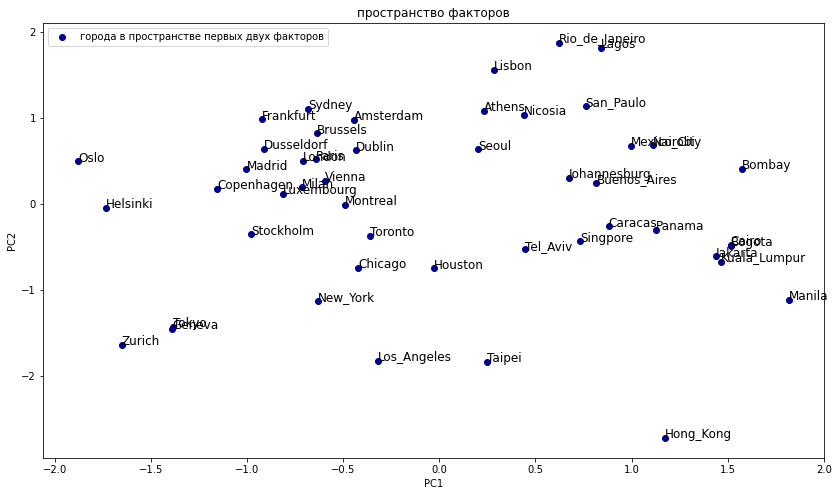

In [28]:
fig, ax = plt.subplots(1,1, figsize = (14, 8), facecolor='w', edgecolor='k')
ax.scatter(fact['f1'], fact['f2'], color = 'darkblue', label = 'города в пространстве первых двух факторов')

for cities, (i,j) in enumerate(zip(fact['f1'], fact['f2'])):
    plt.text(i, j, s = city[cities], fontsize = 12)
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
ax.set_title('пространство факторов')
plt.show()


**Вывод**: видим, что города разделились на три категории, если мысленно провести 2 линии с отрицательным углом наклона - первая категория - отрицательные значения по первому фактору, вторая - примерно около нуля, третья - положительные значения, причем чем больше значение первого фактора тем больше значения второго фактора (это подтверждает корреляцию между первым и вторым фактором в таблиц нагрузки). Первый фактор будем рассматривать как бедность города - чем он меньше, тем более богатый и дорогой город - это и видно на графике выше в пространстве двух факторов.
`Zurich` - самый успешный город, потом идут средние по состоянию богатства города, после - бедные города - правый верхний угол.

## Сравнение с результатами кластерного анализа, полученными при выполнении задания 3.

В прошлом задании мы получили, что выборка неплохо кластеризуется на два класса при `silhouette`, равным `0.58` и получили,что гипотеза о незначимости различия средних верна. Следовательно, мы получили следующий результат: мы правильно разделили на кластеры и можем говорить о существовании двух кластеров благополучия города. В данном задании мы показываем, какой фактор имеет набиольшое влияние на разделение в этих кластерах - как выяснено, этим фактором является первым фактор - среднее количество часов, по которому работают люди.

## PCA in sklearn и BiPlot

Реализация PCA существует в Sklearn. Пример построения BiPlot взят [здесь](https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot)

#### Sklearn PCA

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.values
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

#### BiPlot

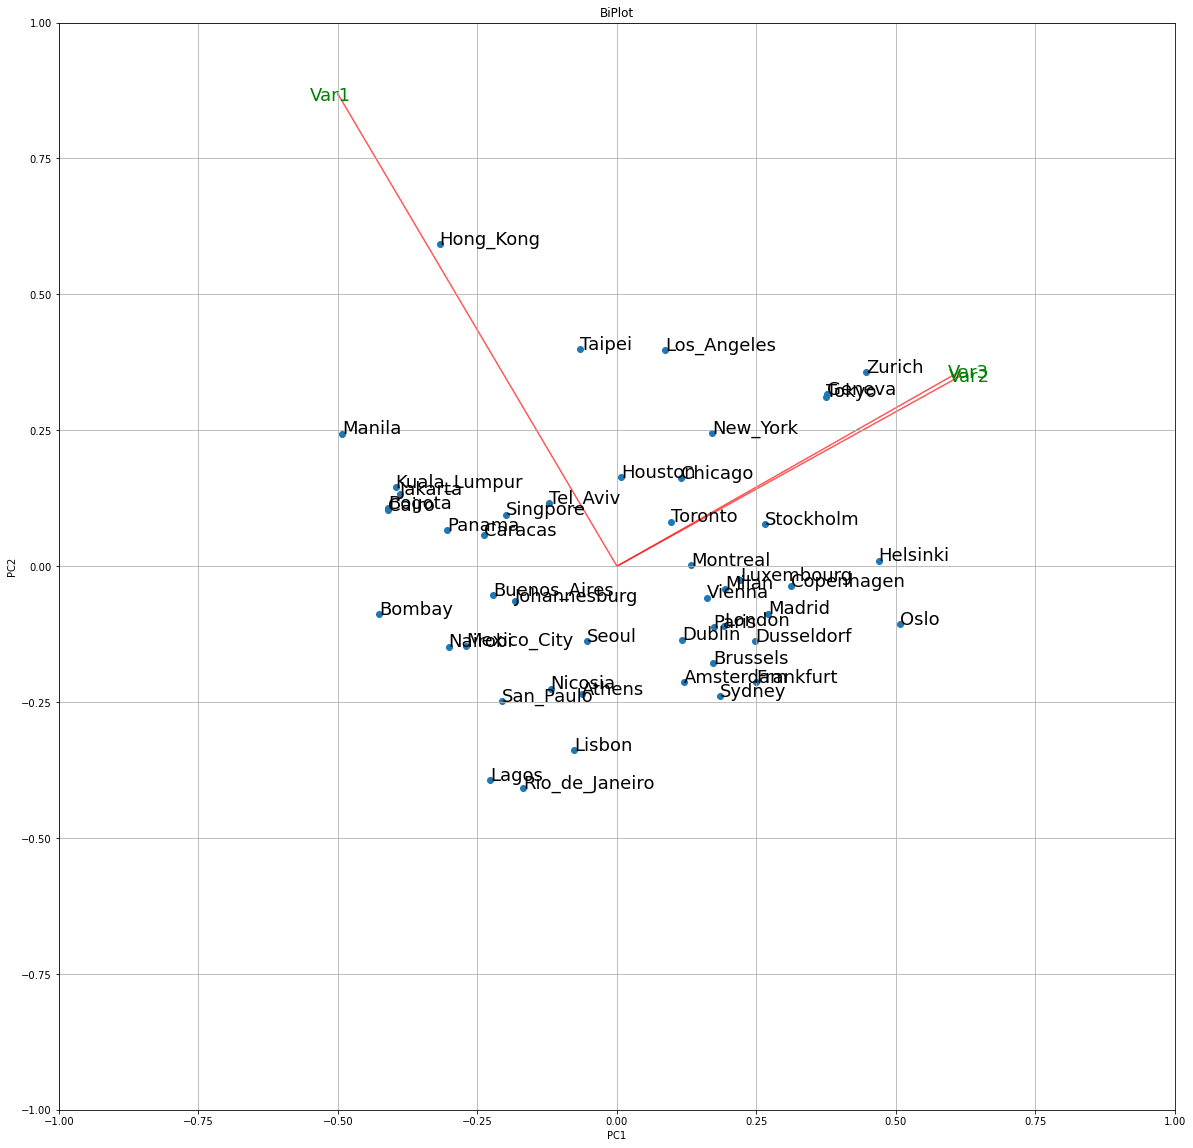

In [30]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for cities, (i,j) in enumerate(zip(xs * scalex, ys * scaley)):
        plt.text(i, j, s = city[cities], fontsize = 18)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.03, coeff[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center',fontsize = 18)
        else:
            plt.text(coeff[i,0]*1.03, coeff[i,1], labels[i], color = 'g', ha = 'center', va = 'center', fontsize = 18)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(20,20))
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.title("BiPlot")

plt.show()

**Вывод**: мы построили график BiPlot: точки, расположенные близко друг к другу в биплоте, представляют собой наблюдения со сходными значениями - можно просмотреть похожесть городовю. Косинус угла между парами векторов указывает на корреляцию между соответствующими переменными. Сильно коррелированные переменные указывают в сходных направлениях; некоррелированные переменные почти перпендикулярны друг другу, поэтому Var1 и Var2 неколлерированы. PCA полностью проведен.